In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

matches = pd.read_csv("matches.csv")
deliveries=pd.read_csv('deliveries.csv')
matches = matches.replace("Rising Pune Supergiant", "Rising Pune Supergiants")

In [113]:
# Q1

print(len(matches[matches["season"]==2008]))

58


In [114]:
# Q2

print(f"{matches["city"].value_counts().idxmax()}-{matches["city"].value_counts().max()}")
print(f"{matches["city"].value_counts().idxmin()}-{matches["city"].value_counts().min()}")

Mumbai-101
Bloemfontein-2


In [115]:
# Q3

print(matches.value_counts("city",ascending=False).to_string(header= False ,name=False))



Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Port Elizabeth      7
Cuttack             7
Ranchi              7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2


In [116]:
# Q4

print(f"{matches.value_counts("toss_winner").idxmax()}-{matches.value_counts("toss_winner").max()}")
print(f"{matches.value_counts("toss_winner").idxmin()}-{matches.value_counts("toss_winner").min()}")

Mumbai Indians-98
Kochi Tuskers Kerala-8


In [117]:
# Q5

print(matches.groupby("toss_winner")["toss_decision"].value_counts().to_string(name=False))

toss_winner                  toss_decision
Chennai Super Kings          bat              48
                             field            41
Deccan Chargers              bat              24
                             field            19
Delhi Capitals               field             8
                             bat               2
Delhi Daredevils             field            51
                             bat              29
Gujarat Lions                field            14
                             bat               1
Kings XI Punjab              field            55
                             bat              26
Kochi Tuskers Kerala         field             5
                             bat               3
Kolkata Knight Riders        field            62
                             bat              30
Mumbai Indians               field            54
                             bat              44
Pune Warriors                bat              11
                          

In [118]:
# Q6

print(matches["result"].value_counts().to_string(header=False, name=False))

normal       743
tie            9
no result      4


In [119]:
# Q7   

print(matches.loc[matches["result"] == "tie", ["team1","team2"]].to_string(index = False))


                      team1                       team2
              Gujarat Lions              Mumbai Indians
           Rajasthan Royals       Kolkata Knight Riders
            Kings XI Punjab         Chennai Super Kings
Royal Challengers Bangalore         Sunrisers Hyderabad
           Delhi Daredevils Royal Challengers Bangalore
           Rajasthan Royals       Kolkata Knight Riders
           Rajasthan Royals             Kings XI Punjab
      Kolkata Knight Riders              Delhi Capitals
             Mumbai Indians         Sunrisers Hyderabad


In [120]:
# Q8

print(matches["winner"][matches["win_by_runs"].idxmax()],"by",matches["win_by_runs"].max(),"runs")

Mumbai Indians by 146 runs


In [121]:
# Q9

print(matches[matches["win_by_runs"] == matches[matches["win_by_runs"] != 0]["win_by_runs"].min()]["winner"].unique())


['Mumbai Indians' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Gujarat Lions' 'Royal Challengers Bangalore']


In [122]:
# Q10
 
print(matches["player_of_match"].value_counts()[lambda x:x>=3].to_string(name = False))

player_of_match
CH Gayle            21
AB de Villiers      20
RG Sharma           17
MS Dhoni            17
DA Warner           17
YK Pathan           16
SR Watson           15
SK Raina            14
G Gambhir           13
MEK Hussey          12
AM Rahane           12
V Kohli             12
V Sehwag            11
DR Smith            11
AD Russell          11
A Mishra            11
JH Kallis           10
KA Pollard          10
SE Marsh             9
AT Rayudu            9
SP Narine            9
Harbhajan Singh      8
SR Tendulkar         8
RA Jadeja            8
UT Yadav             8
Rashid Khan          7
RV Uthappa           7
AC Gilchrist         7
M Vijay              6
RR Pant              6
S Dhawan             6
SL Malinga           6
A Nehra              6
BJ Hodge             6
HH Pandya            6
SC Ganguly           5
SPD Smith            5
PA Patel             5
KC Sangakkara        5
DPMD Jayawardene     5
BB McCullum          5
JP Faulkner          5
AJ Finch          

In [123]:
# Q11

print(matches["player_of_match"].value_counts().idxmax(), matches["player_of_match"].value_counts().max())

CH Gayle 21


In [124]:
# Q12

print(matches["venue"][matches["win_by_runs"].idxmax()])

Feroz Shah Kotla


In [125]:
# Q13 

print(matches[matches["win_by_runs"] == matches[matches["win_by_runs"] != 0]["win_by_runs"].min()]["venue"].unique())

['Rajiv Gandhi International Stadium, Uppal' 'Wankhede Stadium'
 'New Wanderers Stadium' 'Feroz Shah Kotla' 'Subrata Roy Sahara Stadium'
 'MA Chidambaram Stadium, Chepauk'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'M. Chinnaswamy Stadium' 'Rajiv Gandhi Intl. Cricket Stadium']


In [126]:
# Q14

print(pd.concat([matches["umpire1"],matches["umpire2"],matches["umpire3"]]).value_counts().idxmax())

S Ravi


In [127]:
# Q15
print(matches["season"].value_counts().sort_index().to_string(name=False, header=False))

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60


In [128]:
# Q16

deliveries1 = deliveries.rename(columns={"match_id":"id"})
merge_df = deliveries1.merge(matches, on="id")

for year in sorted(set(matches["season"])):
    merge_df_year = merge_df[merge_df["season"] == year]
    print(f"{year} - {merge_df_year["total_runs"].sum()}")

2008 - 17937
2009 - 16353
2010 - 18883
2011 - 21154
2012 - 22453
2013 - 22602
2014 - 18931


2015 - 18353
2016 - 18862
2017 - 18786
2018 - 20706
2019 - 20270


In [129]:
# Q17

print(matches["toss_winner"].value_counts().to_string(name = False))

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8


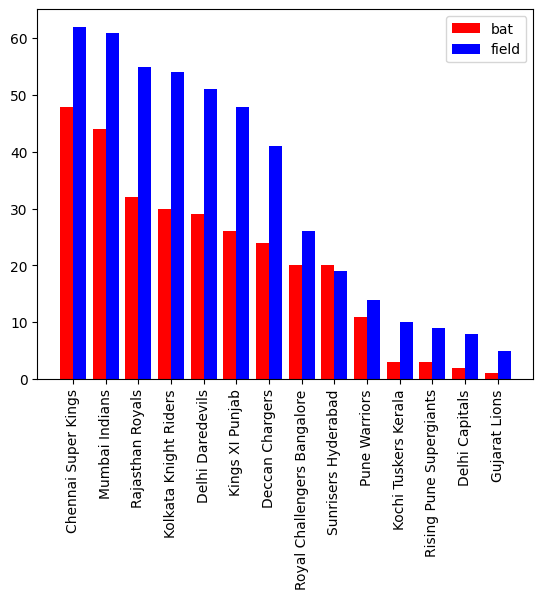

In [130]:
# Q18

match_bat = matches[matches["toss_decision"] == "bat"]["toss_winner"].value_counts()
match_field = matches[matches["toss_decision"] == "field"]["toss_winner"].value_counts()

x = np.arange(len(set(matches["team1"])))
w = 0.4

plt.bar(x-(w/2), match_bat.values, w, color = "r")
plt.bar(x+(w/2), match_field.values, w, color = "b")
plt.xticks(x, match_bat.index, rotation = 90)
plt.legend(["bat", "field"])
plt.show()

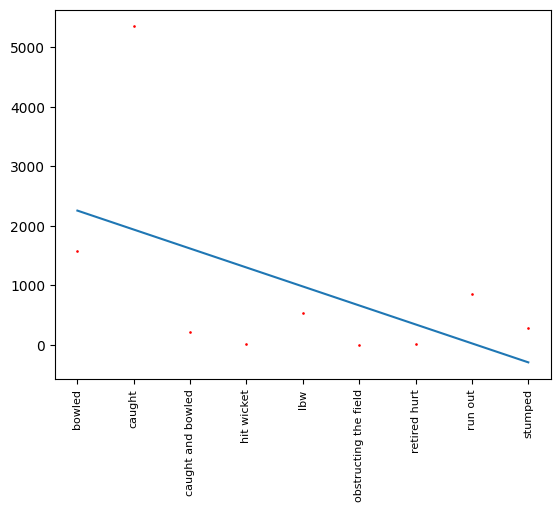

In [131]:
# Q19

dismissal_series = deliveries["dismissal_kind"].value_counts().sort_index()
x = np.arange(len(dismissal_series))

a,b = np.polyfit(x, dismissal_series.values, 1)
plt.scatter(x,dismissal_series.values, 0.8, color = "r")
plt.plot(x, a*x + b)
plt.xticks(x, dismissal_series.index, rotation = 90, fontsize = 8 )
plt.show()

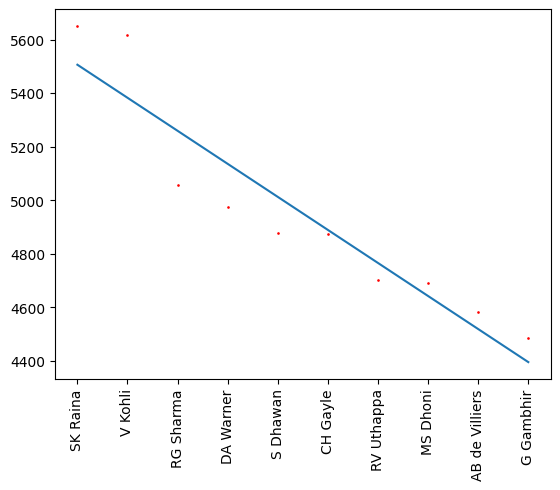

In [132]:
# Q20
batsman_runs = deliveries.groupby("batsman")["total_runs"].sum()
batsman_runs = batsman_runs.sort_values(ascending=False).head(10)
x = np.arange(len(batsman_runs))

a,b = np.polyfit(x, batsman_runs.values, 1)
plt.scatter(x, batsman_runs.values, 0.8, color = "r")
plt.plot(x, a*x + b)
plt.xticks(x, batsman_runs.index, rotation = 90)
plt.show()

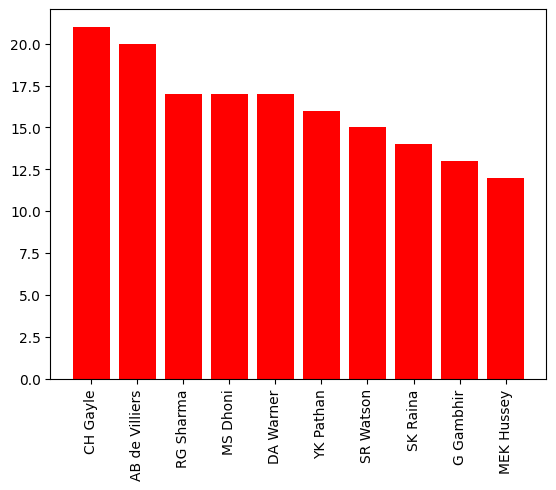

In [133]:
# Q21

x = np.arange(10)
top_10 = matches["player_of_match"].value_counts().head(10)

plt.bar(x, top_10.values, 0.8 ,color = "red")
plt.xticks(x, top_10.index, rotation = 90)
plt.show()



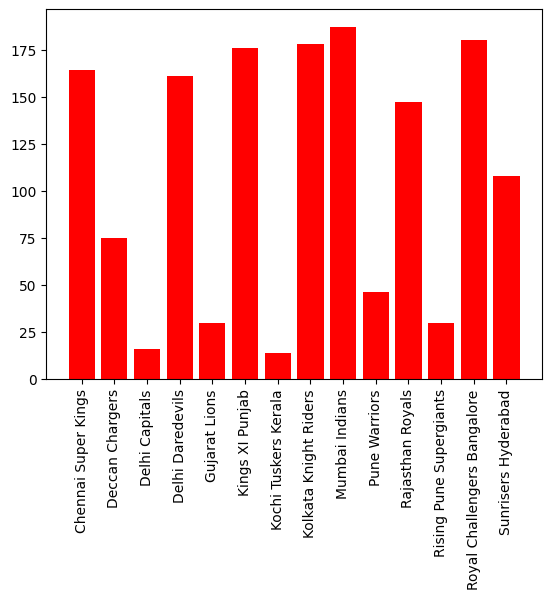

In [134]:
# Q22

team_matches = pd.concat([matches["team1"], matches["team2"]])
x = np.arange(len(set(team_matches)))

plt.bar(x, team_matches.value_counts().sort_index().values, 0.8, color = "r")
plt.xticks(x, team_matches.value_counts().sort_index().index, rotation = 90)
plt.show()




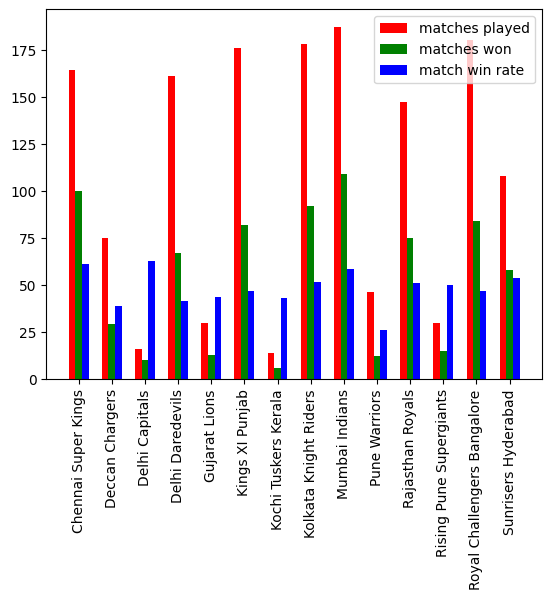

In [135]:
# Q23

matches_played = pd.concat([matches["team1"], matches["team2"]]).value_counts().sort_index()
match_wins = matches["winner"].value_counts().sort_index()
match_win_rate = (match_wins.to_numpy() / matches_played.to_numpy())*100

x = np.arange(len(pd.concat([matches["team1"],matches["team2"]]).unique()))
w = 0.2

plt.bar(x-w, matches_played, w, color = "r")
plt.bar(x, match_wins, w, color = "g")
plt.bar(x+w , match_win_rate, w, color = "b")
plt.xticks(x,matches_played.index, rotation = 90)
plt.legend(["matches played", "matches won", "match win rate"])
plt.show()


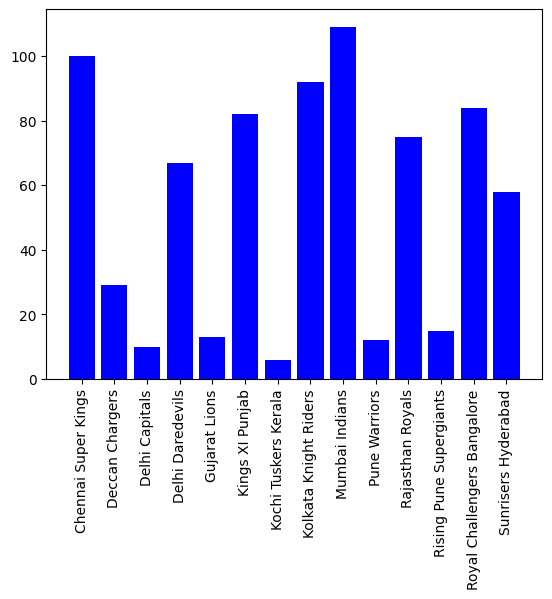

In [136]:
# Q24

x = np.arange(len(set(matches["team1"])))

plt.bar(x, match_wins, 0.8, color = "b")
plt.xticks(x, match_wins.index, rotation = 90)
plt.show()

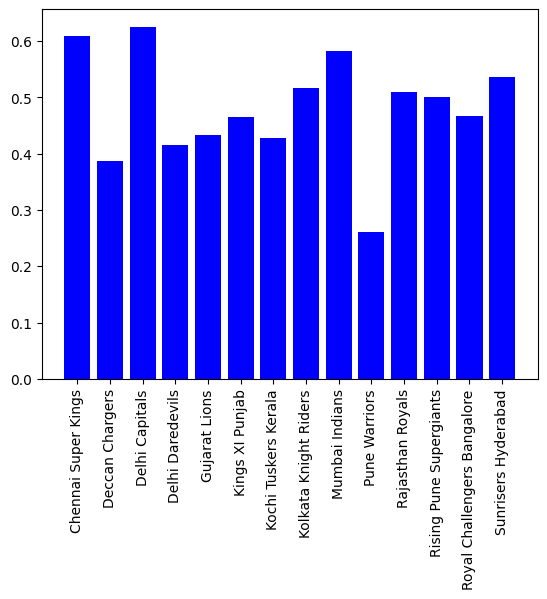

In [137]:
# Q25

plt.bar(x, match_win_rate/100, 0.8, color = "blue")
plt.xticks(x, match_wins.index, rotation = 90)
plt.show()

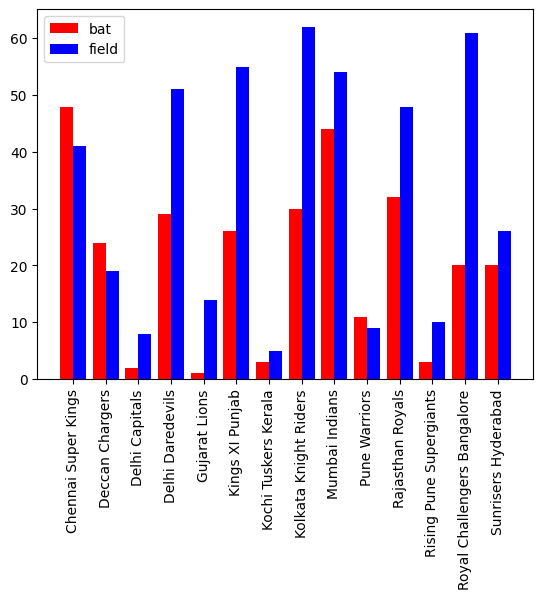

In [138]:
# Q26

toss_decisions = matches.groupby("toss_winner")["toss_decision"].value_counts().sort_index()
x = np.arange(len(set(pd.concat([matches["team1"],matches["team2"]]))))
w = 0.4

plt.bar(x-(w/2), toss_decisions.values[::2], w, color = 'r')
plt.bar(x+(w/2), toss_decisions.values[1::2], w, color = "b")
plt.xticks(x, sorted(set(matches["toss_winner"])), rotation = 90)
plt.legend(["bat","field"])
plt.show()


              